In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

Steps 
* Showing Missing Values
* Showing the skewness
* Handling the missing values by filling them with month average
* Showing the Outliers using Boxplot 
* Removing the Outliers with iqr 5% and 95% 
* Filling the removed outliers with month average again
* Showing the Outliers using Boxplot 
* Showing the skewness again
* Showing the rekations, heatmap, coorelation.

In [2]:
df = pd.read_csv('../../data/raw/airport.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,BP,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check Missing Values
df.isna().sum()

From Date          0
NH3             3753
SO2             1981
CO              2352
Ozone           1905
Benzene         2953
PM2.5           3072
PM10            2314
NO              3103
NO2             4008
NOx             3005
Eth-Benzene     5037
MP-Xylene       4951
O               3229
WS              3231
WD              3229
BP             16859
AT              3284
dtype: int64

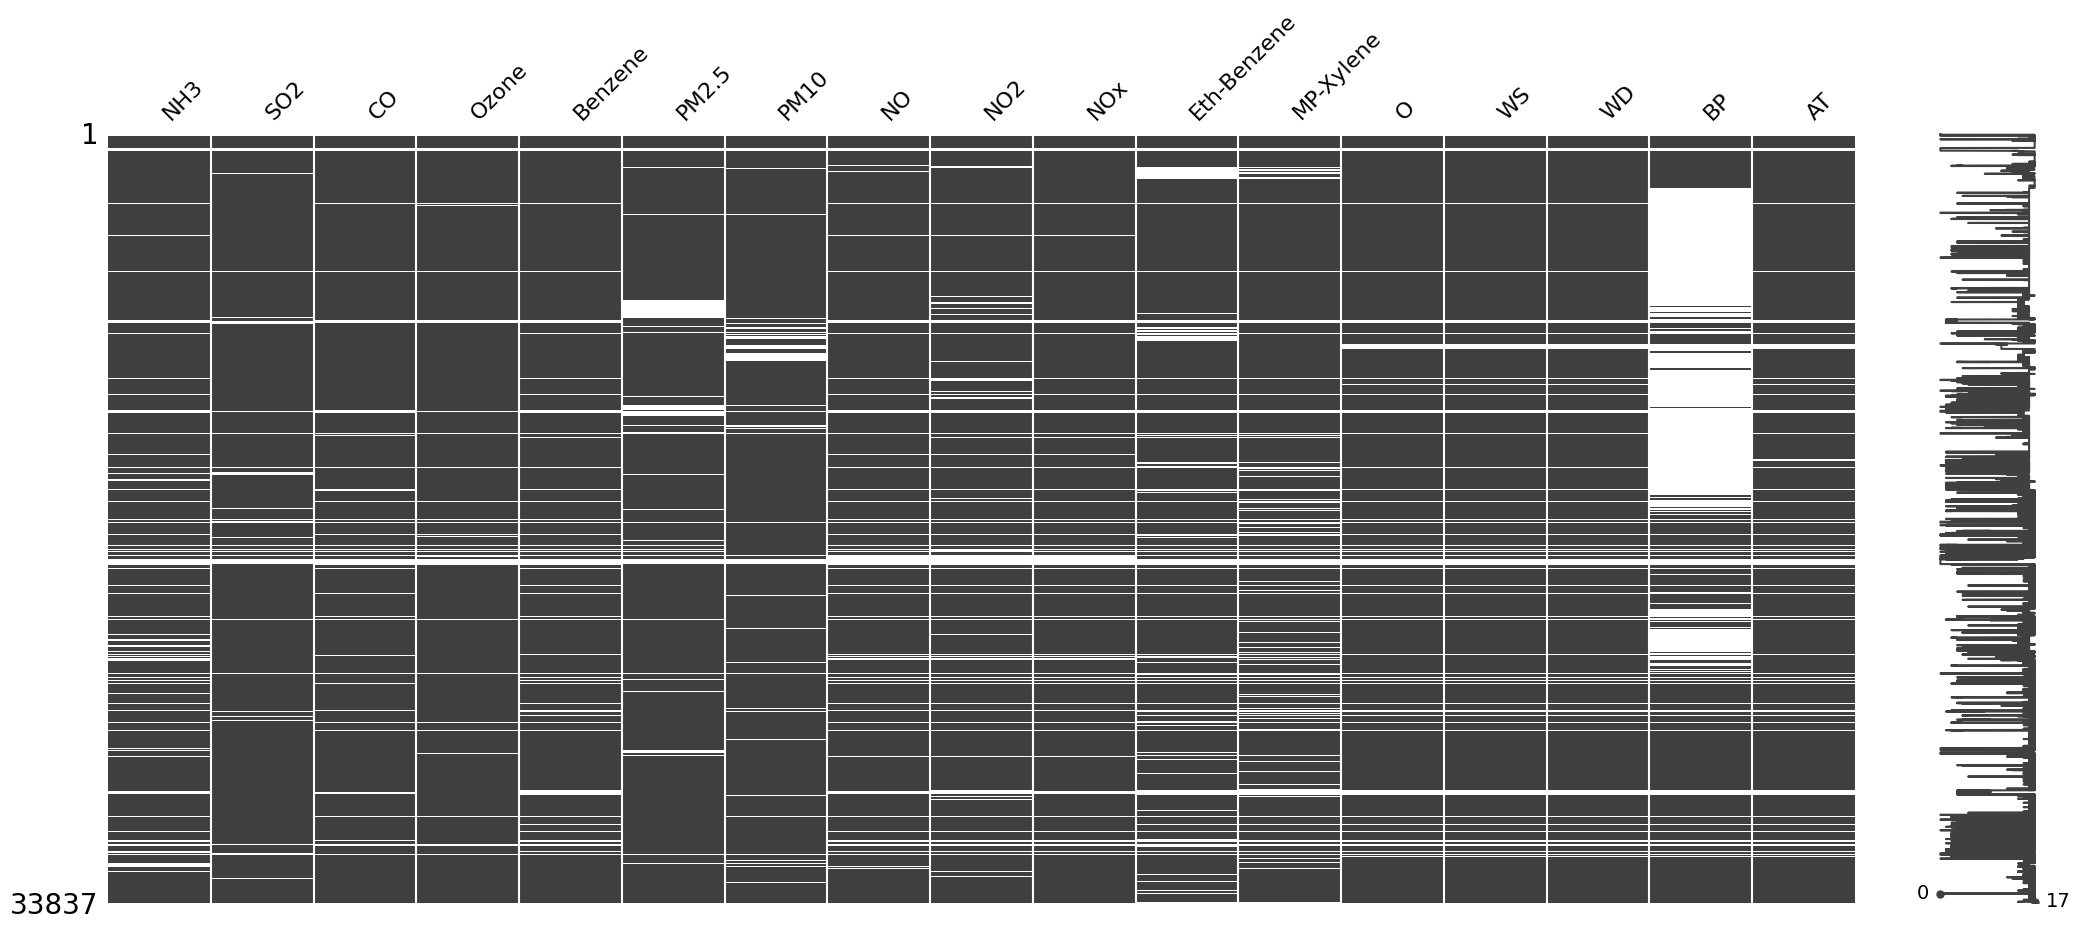

In [4]:
# Visualize the missingness 
msno.matrix(df.iloc[:,1:])
plt.show()

In [ ]:
df.drop("BP", axis=1, inplace=True)

<AxesSubplot:>

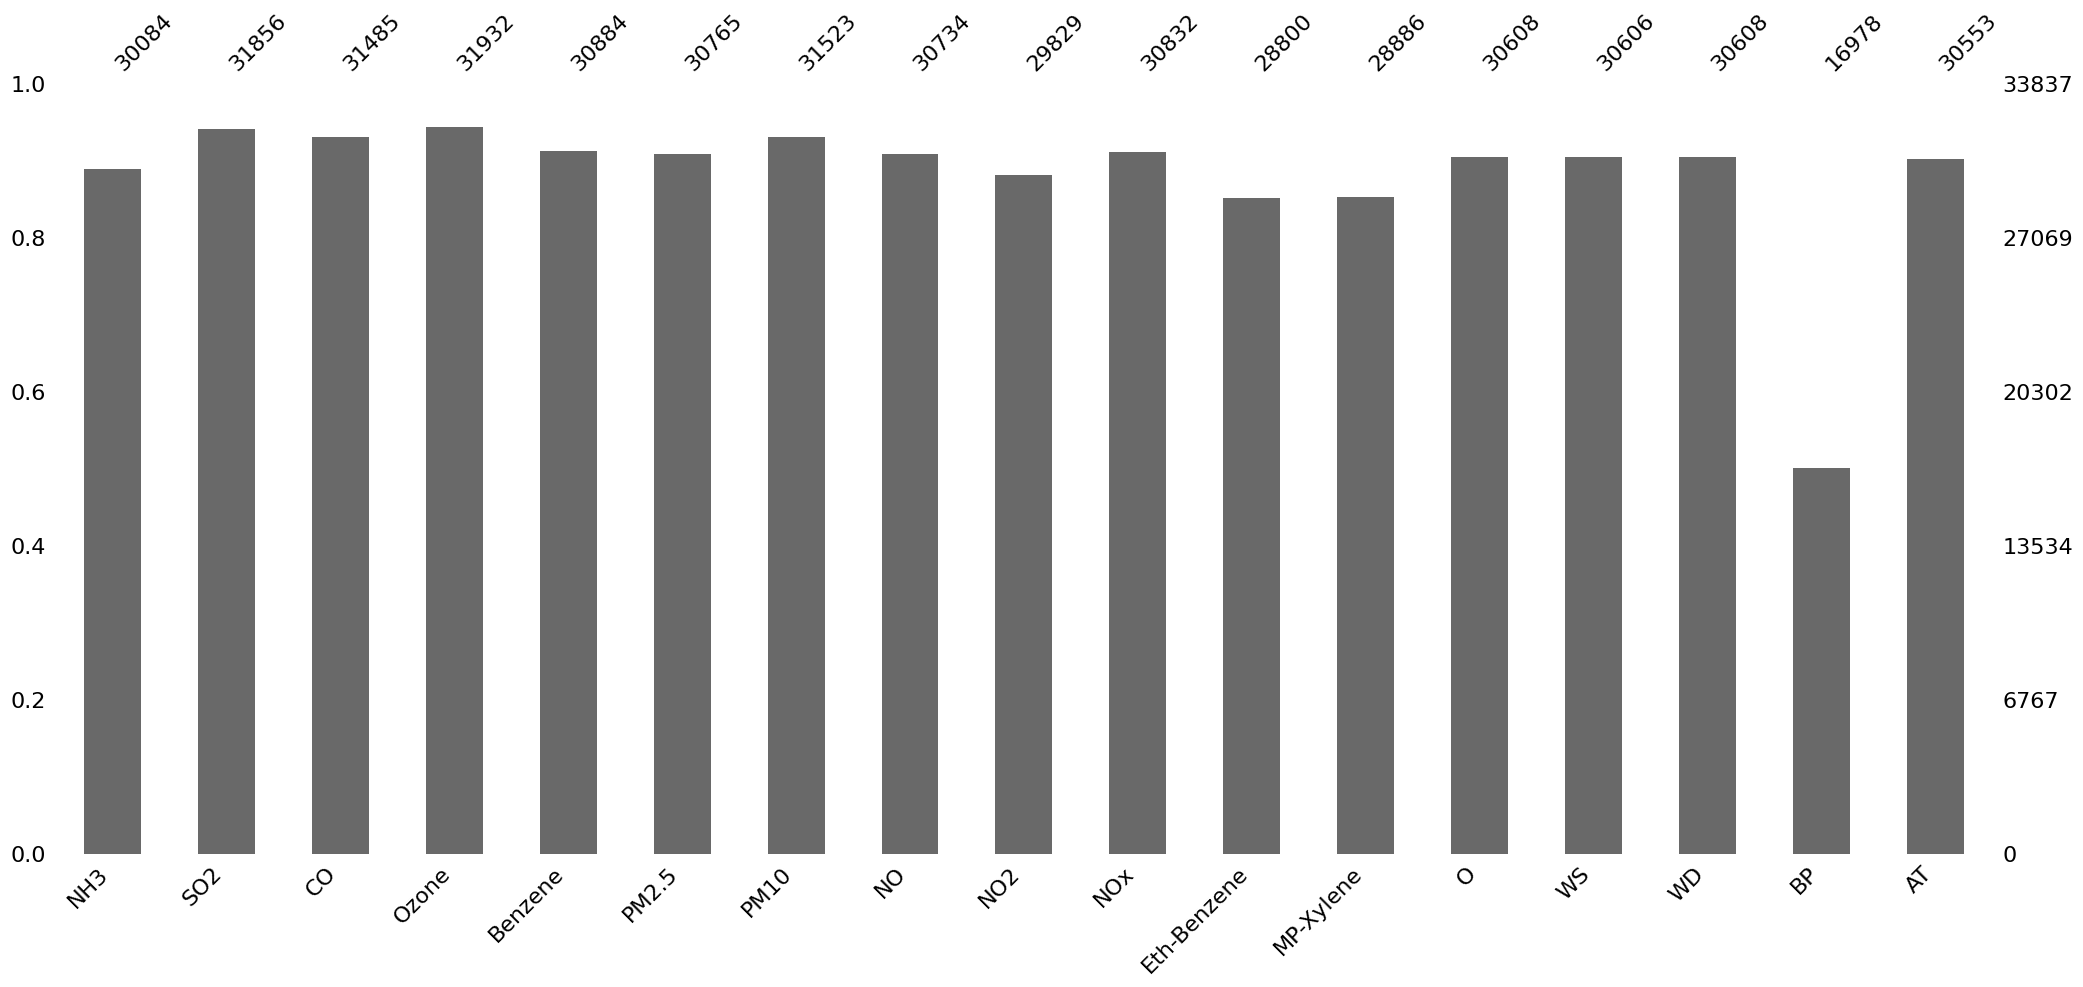

In [63]:
msno.bar(df.iloc[:,1:])

In [64]:
df.describe()

,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,BP,AT
count,30084.000000,31856.000000,31485.000000,31932.000000,30884.000000,30765.000000,31523.000000,30734.000000,29829.000000,30832.000000,28800.000000,28886.000000,30608.000000,30606.000000,30608.000000,16978.000000,30553.000000
mean,17.584587,10.207117,0.971513,21.842142,3.821862,39.757211,131.728795,66.484009,29.391789,94.403374,6.331798,24.277224,72.398515,0.906741,218.901268,998.422219,28.385449
std,13.815314,7.454350,0.710668,25.367688,14.846450,32.259205,94.655259,44.813111,24.413679,46.455528,12.316152,25.124703,17.451529,0.584070,61.719593,7.024619,3.510196
min,0.010000,0.010000,0.000000,0.010000,0.000000,0.030000,0.200000,0.010000,0.010000,0.000000,0.010000,0.010000,16.930000,0.190000,1.570000,980.770000,16.470000
25%,7.460000,5.870000,0.360000,6.120000,0.340000,16.000000,57.450000,34.610000,12.080000,62.150000,1.770000,6.780000,60.620000,0.530000,160.620000,993.590000,26.040000
50%,15.270000,8.840000,0.820000,14.725000,1.350000,31.010000,111.000000,57.950000,23.220000,86.810000,3.450000,19.730000,74.950000,0.800000,226.375000,997.555000,28.000000
75%,24.940000,12.850000,1.480000,25.392500,3.942500,56.900000,187.095000,88.110000,39.480000,116.852500,6.840000,35.197500,86.080000,1.130000,276.270000,1002.757500,30.610000
max,424.060000,160.220000,7.670000,199.780000,446.490000,990.000000,995.000000,496.790000,223.120000,477.140000,316.050000,496.190000,99.950000,17.410000,330.290000,1016.630000,41.660000


C:\Users\HP\AppData\Local\Temp\ipykernel_3440\4017777084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


NH3             4.624278
SO2             2.993256
CO              0.832491
Ozone           2.773104
Benzene        16.285716
PM2.5           4.382801
PM10            1.947915
NO              1.679043
NO2             1.621387
NOx             1.410799
Eth-Benzene    10.911227
MP-Xylene       5.388195
O              -0.512942
WS              4.762203
WD             -0.249951
BP              0.421740
AT              0.175423
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

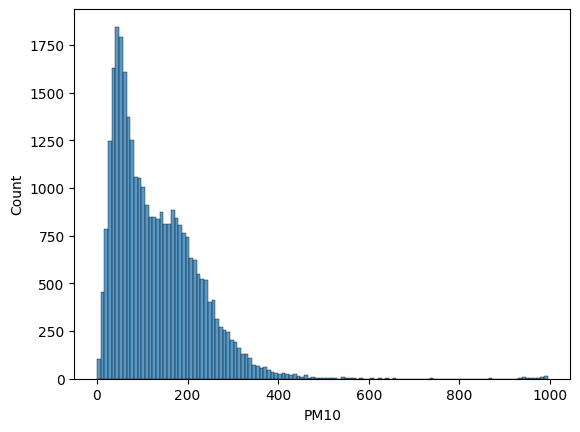

In [65]:
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))

In [66]:
print(df['From Date'].head())

0    01-06-2019 00:00
1    01-06-2019 01:00
2    01-06-2019 02:00
3    01-06-2019 03:00
4    01-06-2019 04:00
Name: From Date, dtype: object


In [67]:
# Fill NaN values with monthly average of particular hour
#Split hour from time into new column
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0    0
1    1
2    2
3    3
4    4
Name: HOUR, dtype: int64

In [68]:
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2019-06-01 00:00:00
1       2019-06-01 01:00:00
2       2019-06-01 02:00:00
3       2019-06-01 03:00:00
4       2019-06-01 04:00:00
                ...        
33832   2023-04-10 16:00:00
33833   2023-04-10 17:00:00
33834   2023-04-10 18:00:00
33835   2023-04-10 19:00:00
33836   2023-04-10 20:00:00
Name: From Date, Length: 33837, dtype: datetime64[ns]

In [69]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date          0
NH3             3753
SO2             1981
CO              2352
Ozone           1905
Benzene         2953
PM2.5           3072
PM10            2314
NO              3103
NO2             4008
NOx             3005
Eth-Benzene     5037
MP-Xylene       4951
O               3229
WS              3231
WD              3229
BP             16859
AT              3284
HOUR               0
dtype: int64


In [70]:
df.set_index('From Date',inplace=True)

In [71]:
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [72]:
df.head()

,From Date,NH3,SO2,CO,Ozone,Benzene,PM2.5,PM10,NO,NO2,NOx,Eth-Benzene,MP-Xylene,O,WS,WD,BP,AT,HOUR,MONTH
0,2019-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6
1,2019-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
2,2019-06-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
3,2019-06-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6
4,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6


In [73]:
cols=['NH3','SO2','CO','Ozone','Benzene','PM2.5','PM10','NO','NO2','NOx','Eth-Benzene','MP-Xylene','O','WS','WD','AT']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [74]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date          0
NH3                0
SO2                0
CO                 0
Ozone              0
Benzene            0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
Eth-Benzene        0
MP-Xylene          0
O                  0
WS                 0
WD                 0
BP             16859
AT                 0
HOUR               0
MONTH              0
dtype: int64


<AxesSubplot:>

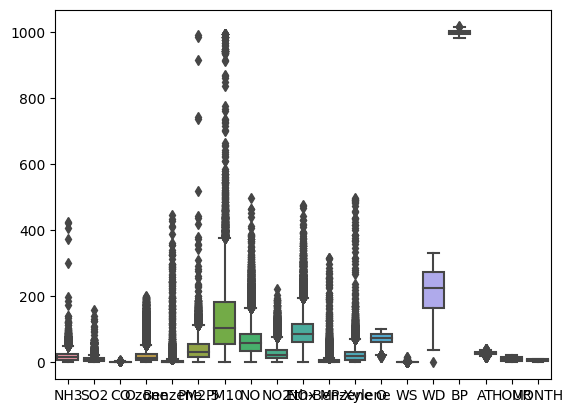

In [75]:
# Plot a box plot of the data
sns.boxplot(data=df)

In [76]:
# Compute the first and third quartiles (Q1 and Q3)
Q1 = df.iloc[:, 1:12].quantile(0.05)
Q3 = df.iloc[:, 1:12].quantile(0.95)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Replace the outliers with NaN values
df.iloc[:, 1:12] = df.iloc[:, 1:12][(df.iloc[:, 1:12] >= lower) & (df.iloc[:, 1:12] <= upper)]

# Fill missing values using interpolation
# df.iloc[:, 1:12] = df.iloc[:, 1:12].interpolate(method='linear', limit_direction='both')

In [77]:
cols=['NH3','SO2','CO','Ozone','Benzene','PM2.5','PM10','NO','NO2','NOx','Eth-Benzene','MP-Xylene','O','WS','WD','AT']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

<AxesSubplot:>

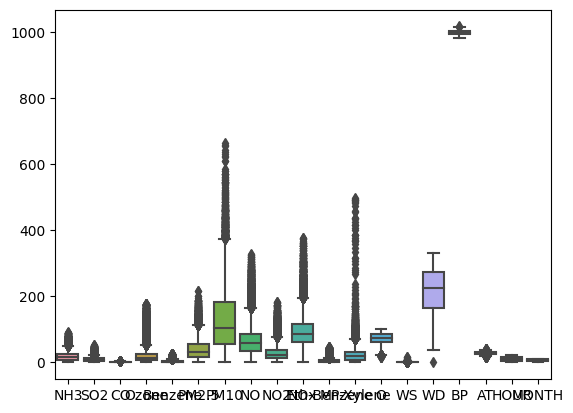

In [78]:
# Plot a box plot of the data
sns.boxplot(data=df)

In [79]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date          0
NH3                0
SO2                0
CO                 0
Ozone              0
Benzene            0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
Eth-Benzene        0
MP-Xylene          0
O                  0
WS                 0
WD                 0
BP             16859
AT                 0
HOUR               0
MONTH              0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3440\663935864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df.skew())


NH3            1.232823
SO2            1.652023
CO             0.827032
Ozone          2.682223
Benzene        2.336922
PM2.5          1.220802
PM10           1.025759
NO             1.466077
NO2            1.606635
NOx            1.327905
Eth-Benzene    2.937981
MP-Xylene      5.747266
O             -0.548206
WS             4.717906
WD            -0.242565
BP             0.421740
AT             0.172617
HOUR           0.000088
MONTH         -0.061831
dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

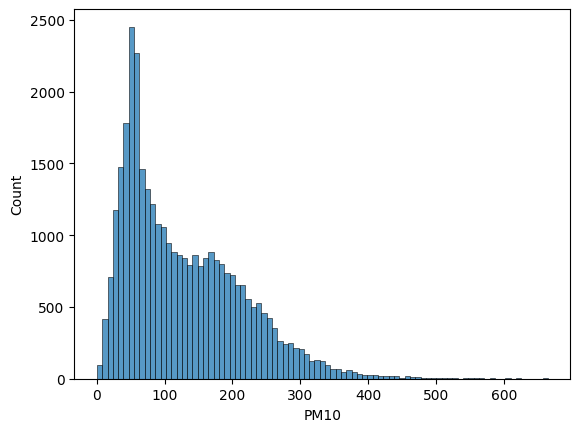

In [80]:
# Checking the skewness again
display(df.skew())

# Plot a histogram of the data
display(sns.histplot(df['PM10'], kde=False))

In [81]:
df.to_csv('../../data/processed/airport_june_2019.csv', index=False)

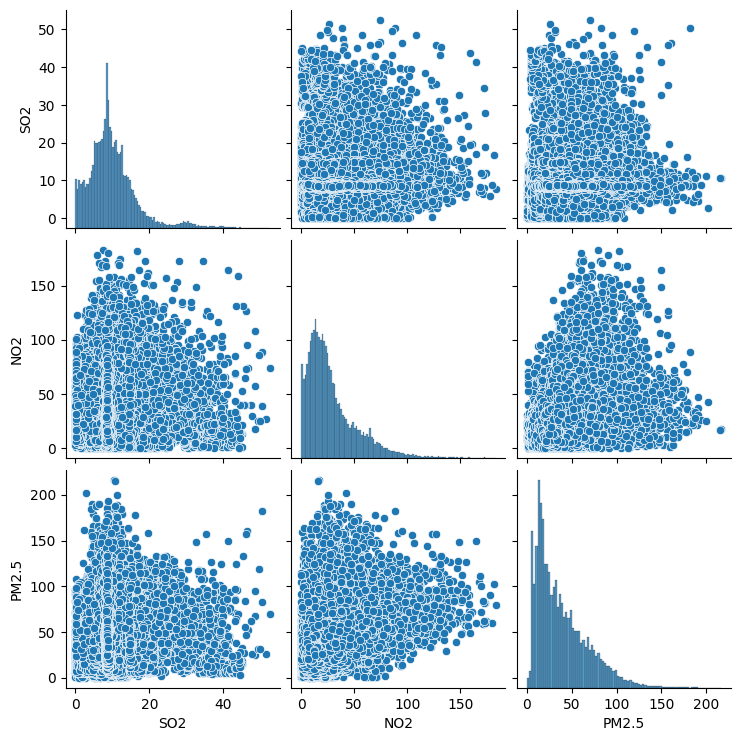

In [82]:
sns.pairplot(df[['SO2','NO2','PM2.5']])

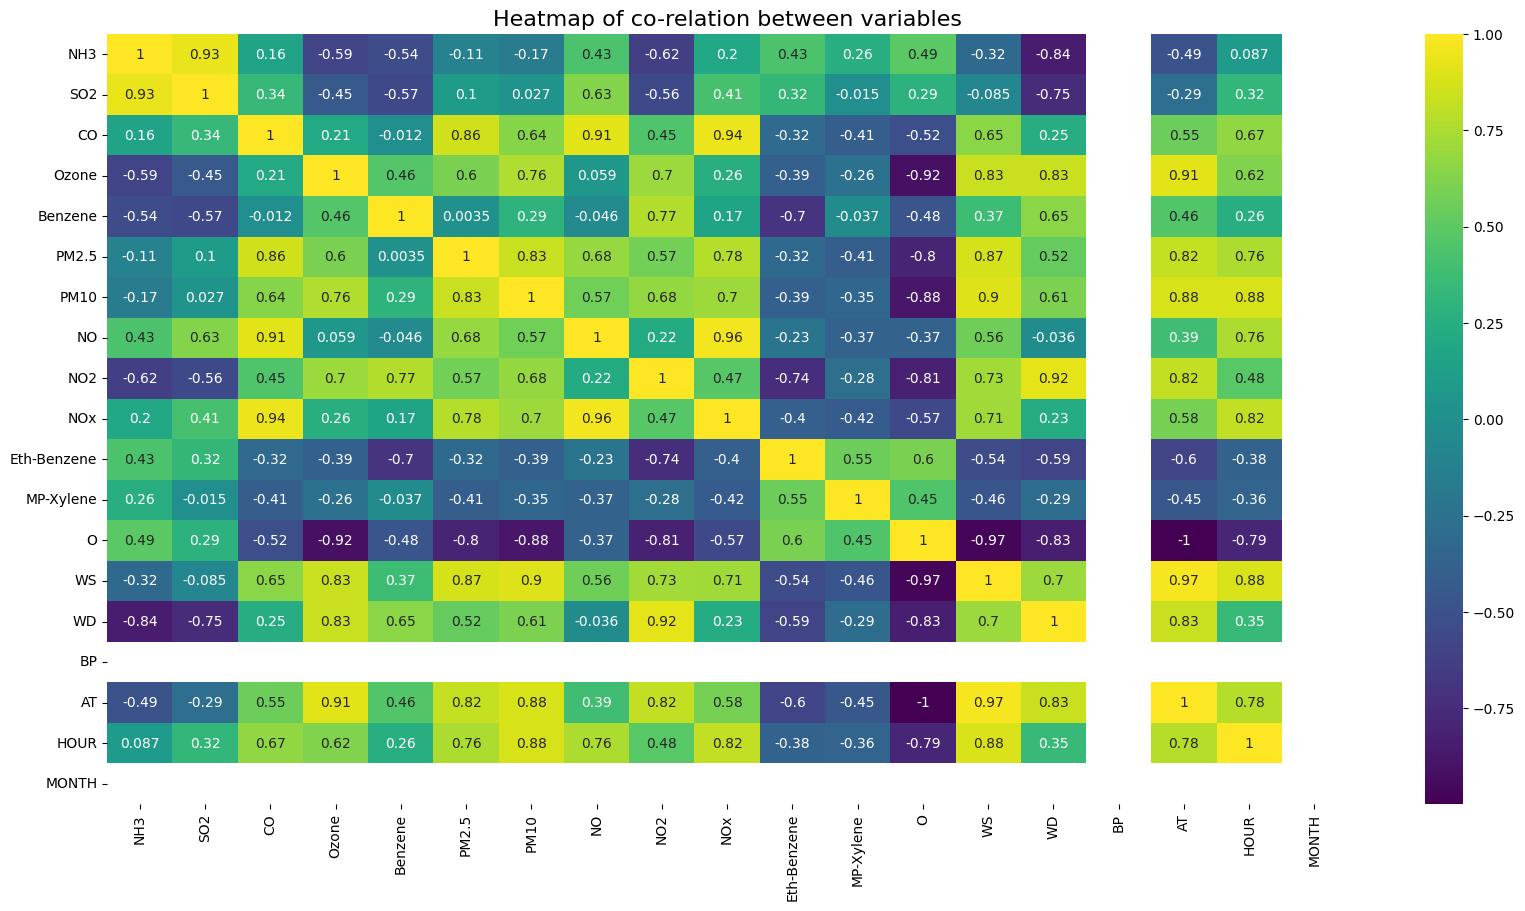

In [83]:
#Use heatmap to see corelation between variables
plt.figure(figsize=(20,10))

sns.heatmap(df.iloc[1:11].corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

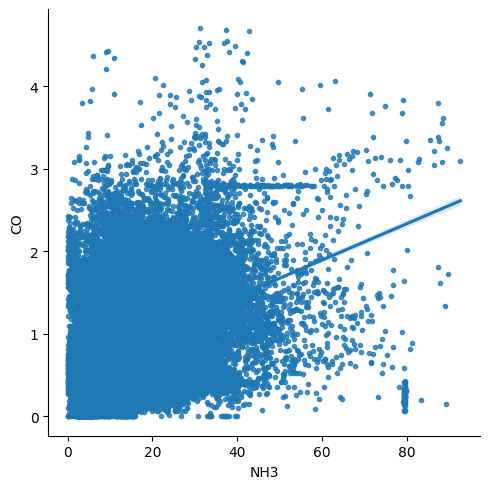

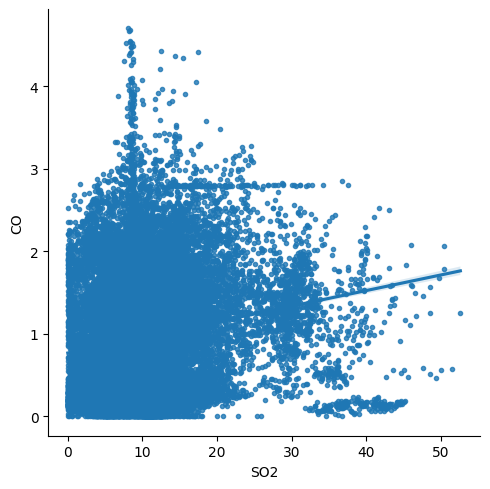

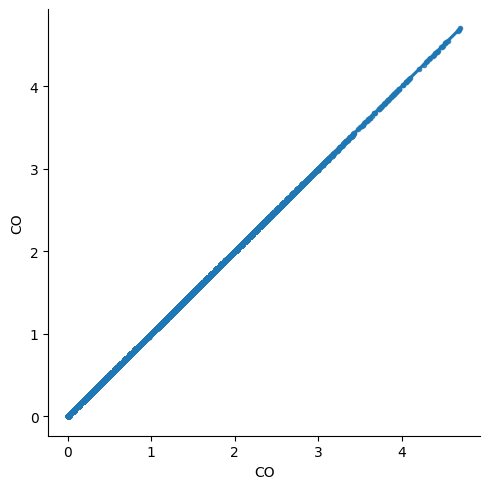

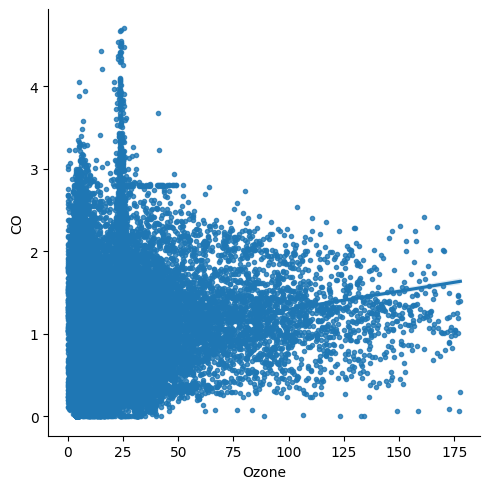

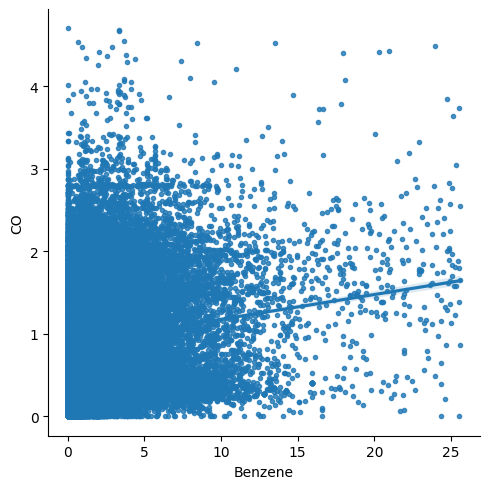

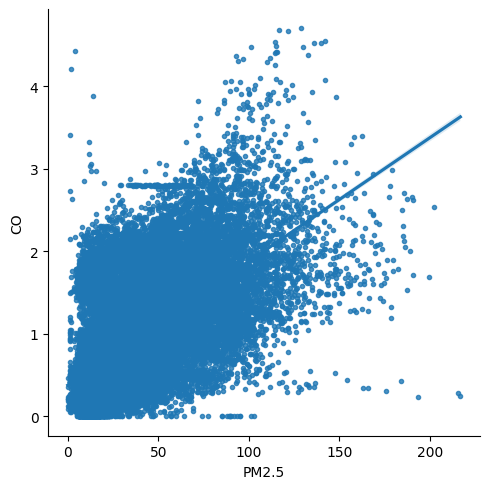

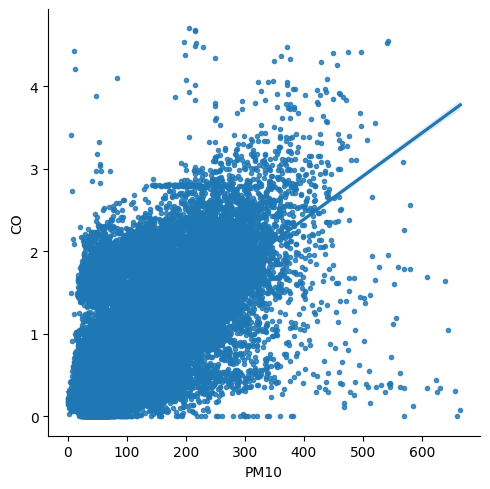

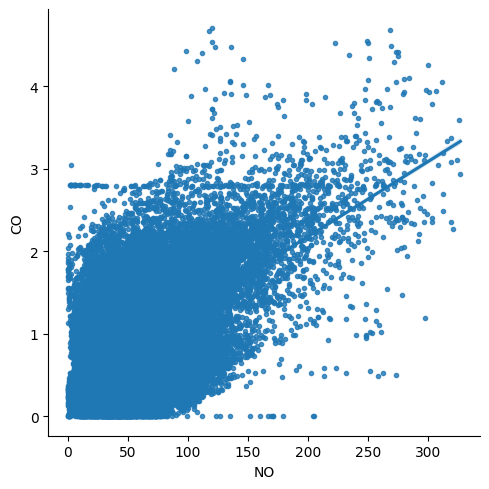

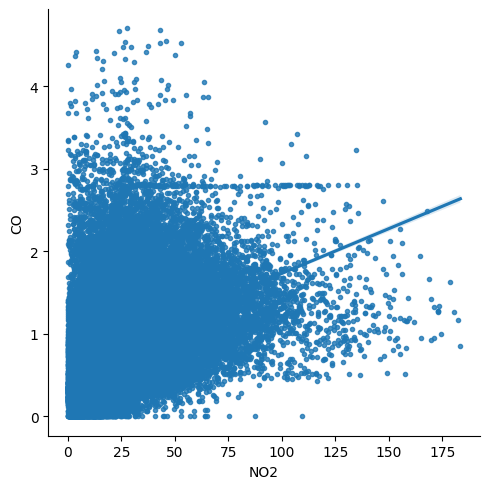

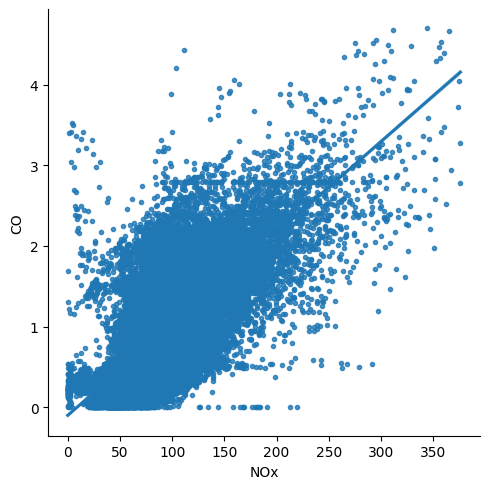

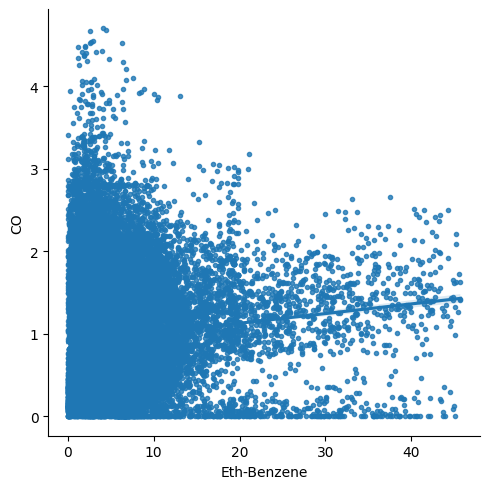

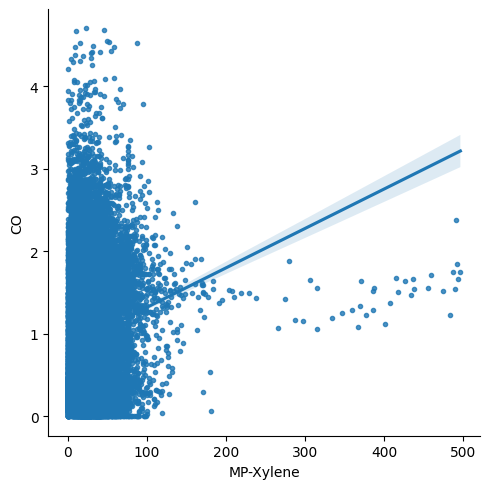

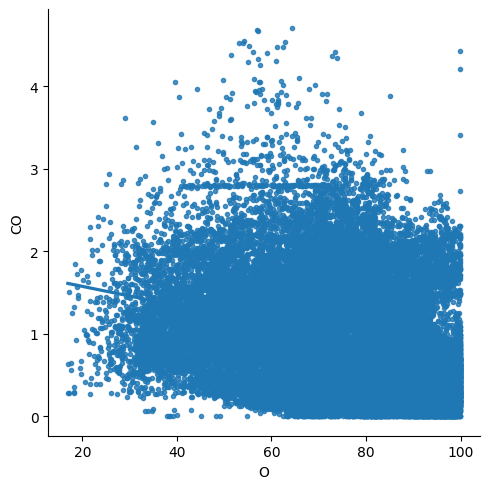

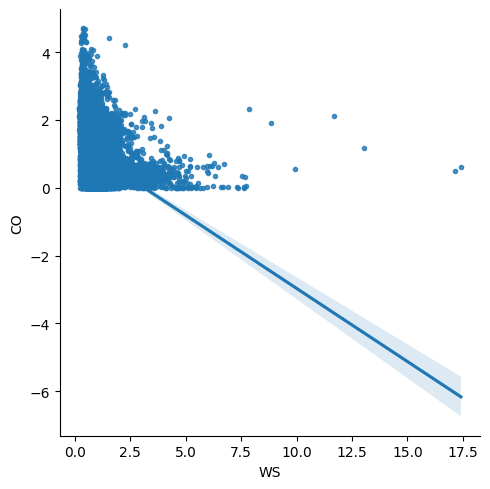

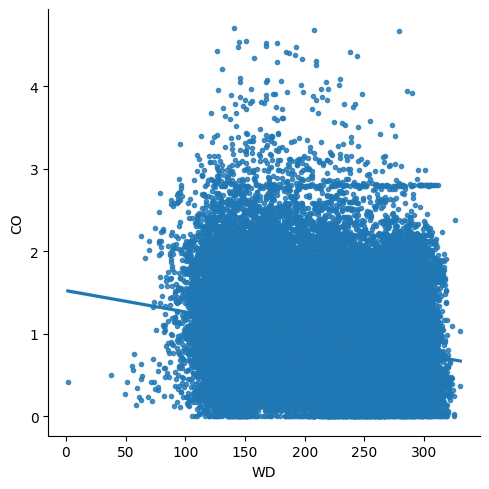

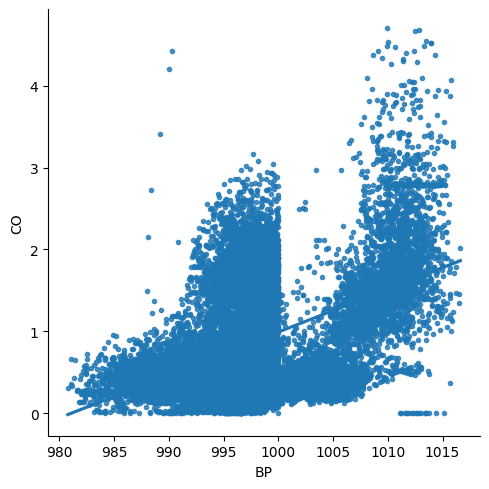

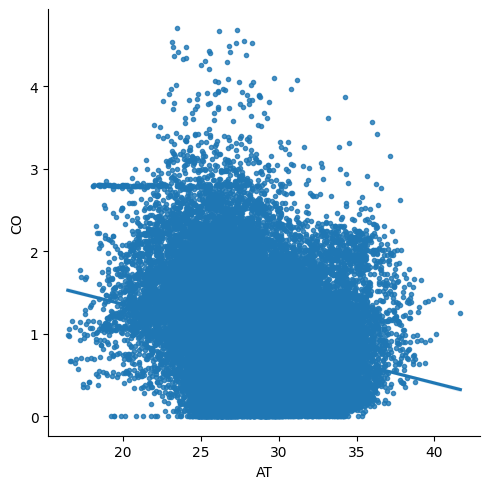

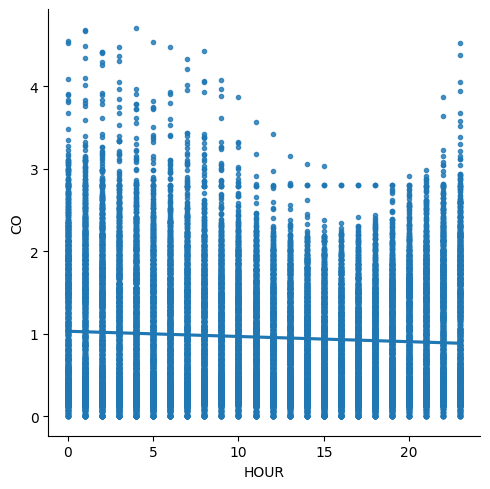

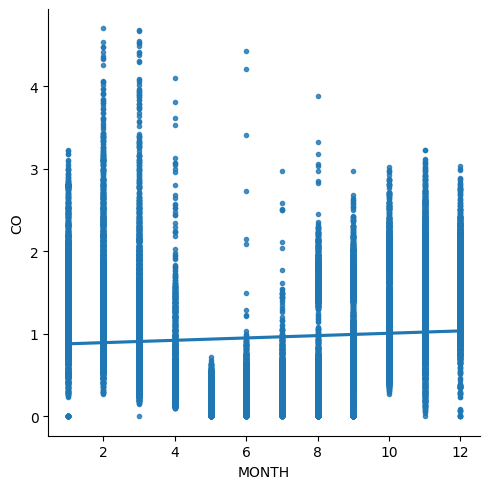

In [84]:
#plot all X-features against output variable RH
col_=df.columns.tolist()[1:]
for i in df.columns.tolist()[1:]:
    sns.lmplot(x=i,y='CO',data=df,markers='.')

In [85]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [86]:
col_=df.columns.tolist()[1:8]
col_

['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM2.5', 'PM10']

In [89]:
col_=df.columns.tolist()[1:8]
X=df[col_].drop('PM2.5',axis=1)     #X-input features
y=df['PM2.5']                    #y-input features

In [90]:
# X=df[col_].drop('PM2.5',axis=1) 
# y=df['PM2.5']  
# ss=StandardScaler()
# X_std=ss.fit_transform(X)
# X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
# lr=LinearRegression()
# lr_model=lr.fit(X_train,y_train)  
# y_pred=lr_model.predict(X_test)                      #predict using the model
# rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
# print('Baseline RMSE of model:',rmse)

In [91]:
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (23685, 6)
Test data size: (10152, 6)


In [92]:
df.isnull().sum()

From Date          0
NH3                0
SO2                0
CO                 0
Ozone              0
Benzene            0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
Eth-Benzene        0
MP-Xylene          0
O                  0
WS                 0
WD                 0
BP             16859
AT                 0
HOUR               0
MONTH              0
dtype: int64

In [93]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [94]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 38.694328439128235
--------------------------------
Slope:


[('NH3', 2.2344812442995226),
 ('SO2', -1.3046858393863037),
 ('CO', 2.297107901446596),
 ('Ozone', -1.113088910379358),
 ('Benzene', -1.0768143970592314),
 ('PM10', 23.173612875758728)]

In [95]:
y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 13.83868879695665


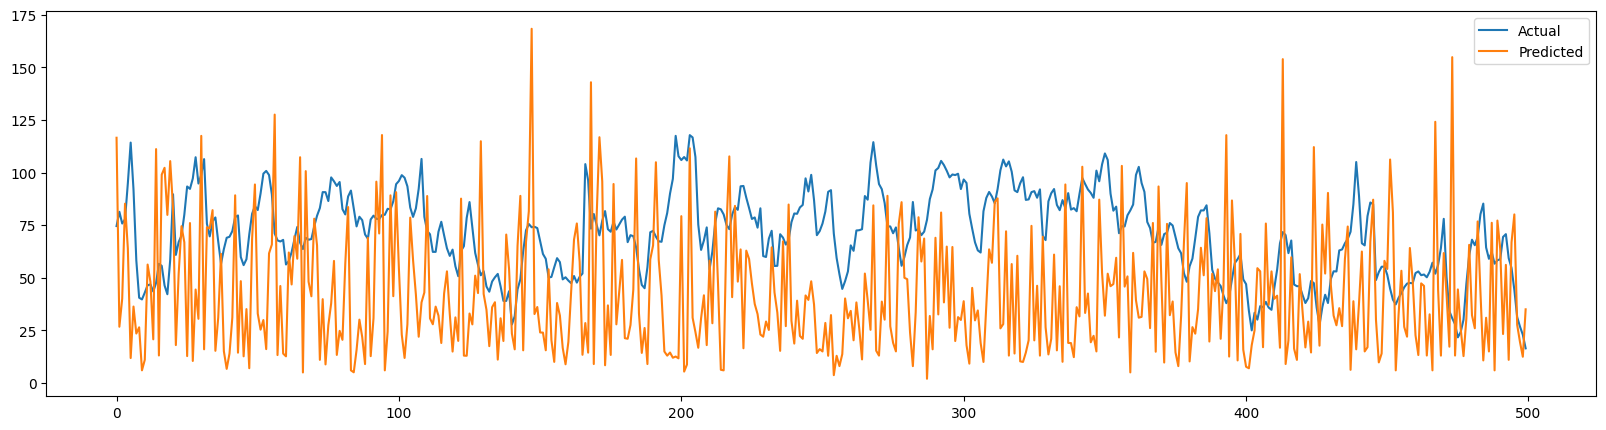

In [96]:
# # Plot predicted vs true values
# plt.scatter(y_test, y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
# plt.xlabel('True values')
# plt.ylabel('Predicted values')
# plt.show()
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df['PM2.5'].values[30500:31000], label='Actual')
plt.plot(np.concatenate([y_train, y_test])[30500:31000], label='Predicted')
plt.legend()
plt.show()

In [97]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=df[feature]
    y=df['PM2.5']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))
# print 10 number


In [98]:
col_.remove('PM2.5')        #remove output
col_

['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM10']

In [99]:
print('List of features:',col_)    #print list of features


List of features: ['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM10']


In [101]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:4]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
# print('-------------------------')
# print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
# print('-------------------------')
# print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))
# print('-------------------------')
# print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
# print('-------------------------')
# print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
# print('-------------------------')
# print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['NH3', 'SO2'] 25.690827151514878
-------------------------
RMSE with Features as ['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM10'] 21.64579466019955
-------------------------
RMSE with Features as ['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM10'] 13.83868879695665


In [102]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

In [103]:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

In [104]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 13.949291305634524


In [105]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

In [106]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

In [107]:
#Calculate RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 9.954982827774304


In [108]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [109]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters

In [110]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict

In [111]:
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

RMSE using RF grid search method 11.20618532265073


In [112]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR()

In [113]:
sv_model=sv_reg.fit(X_train,y_train)    #train the model

In [114]:
y_pred_sv=sv_model.predict(X_test)         #predict

In [115]:
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE of SVR model: 12.230899794998155


In [116]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE with Features as ['NH3', 'SO2'] 25.690827151514878
-------------------------
RMSE with Features as ['NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'PM10'] 13.83868879695665
RMSE of Decision Tree Regression: 13.949291305634524
RMSE of predicted RH in RF model: 9.954982827774304
RMSE using RF grid search method 11.20618532265073
RMSE of SVR model: 12.230899794998155
